<a href="https://colab.research.google.com/github/trinhvanypro1/-DataAnalystDeepLearning/blob/main/Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
patient_heart_rate=pd.read_csv('https://raw.githubusercontent.com/huynhhoc/DataAnalystDeepLearning/main/Data/patient_heart_rate.csv')
patient_heart_rate.head(3)

,1,Mickéy Mousé,56,70kgs,72,69,71,-,-.1,-.2
0,2.0,Donald Duck,34.0,154.89lbs,-,-,-,85,84,76
1,3.0,Mini Mouse,16.0,NaN,-,-,-,65,69,72
2,4.0,Scrooge McDuck,NaN,78kgs,78,79,72,-,-,-


Comment: patient_heart_rate data missing header

a. Add columns name for dataframe with information such as: (ID, Name, Age, Weight, m006,m0612,m1218, f006, f0612,f1218)

In [27]:
patient_heart_rate=pd.read_csv('https://raw.githubusercontent.com/huynhhoc/DataAnalystDeepLearning/main/Data/patient_heart_rate.csv', names=['ID','Name','Age','Weight','m006','m0612','m1218','f006','f0612','f1218'])
patient_heart_rate.head(5)

,ID,Name,Age,Weight,m006,m0612,m1218,f006,f0612,f1218
0,1.0,Mickéy Mousé,56.0,70kgs,72,69,71,-,-,-
1,2.0,Donald Duck,34.0,154.89lbs,-,-,-,85,84,76
2,3.0,Mini Mouse,16.0,NaN,-,-,-,65,69,72
3,4.0,Scrooge McDuck,NaN,78kgs,78,79,72,-,-,-
4,5.0,Pink Panther,54.0,198.658lbs,-,-,-,69,NaN,75


2. Multi-variables in one columns

In [28]:
patient_heart_rate[['First Name','Last Name']]=patient_heart_rate['Name'].str.split(' ',expand=True)

In [29]:
patient_heart_rate.head(5)

,ID,Name,Age,Weight,m006,m0612,m1218,f006,f0612,f1218,First Name,Last Name
0,1.0,Mickéy Mousé,56.0,70kgs,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,Donald Duck,34.0,154.89lbs,-,-,-,85,84,76,Donald,Duck
2,3.0,Mini Mouse,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,Scrooge McDuck,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,Pink Panther,54.0,198.658lbs,-,-,-,69,NaN,75,Pink,Panther


Delete columns 'Name'

In [30]:
del patient_heart_rate['Name']
patient_heart_rate.head(3)

,ID,Age,Weight,m006,m0612,m1218,f006,f0612,f1218,First Name,Last Name
0,1.0,56.0,70kgs,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,34.0,154.89lbs,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse


3. Inconsitence values. Convert 'lbs' to kg with columns name 'Weight'

In [31]:
weight=patient_heart_rate['Weight']
for i in range(len(weight)):
  x=str(weight[i])
  if 'lbs' in x[-3:]:
    x=x[:-3:]
    y=int(float(x)/2.2)
    y=str(y)+'kgs'
    weight[i]=y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
patient_heart_rate.head(10)

,ID,Age,Weight,m006,m0612,m1218,f006,f0612,f1218,First Name,Last Name
0,1.0,56.0,70kgs,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,34.0,70kgs,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90kgs,-,-,-,69,NaN,75,Pink,Panther
5,6.0,52.0,85kgs,-,-,-,68,75,72,Huey,McDuck
6,7.0,19.0,56kgs,-,-,-,71,78,75,Dewey,McDuck
7,8.0,32.0,78kgs,78,76,75,-,-,-,Scööpy,Doo
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


4. Drop an empty row[8,9] in data

In [33]:
patient_heart_rate[patient_heart_rate['Age'].isna() & patient_heart_rate['Weight'].isna() & patient_heart_rate['First Name'].isna() & patient_heart_rate['Last Name'].isna()].index

Int64Index([8, 9], dtype='int64')

In [34]:
patient_heart_rate.dropna(how='all', inplace=True)
patient_heart_rate

,ID,Age,Weight,m006,m0612,m1218,f006,f0612,f1218,First Name,Last Name
0,1.0,56.0,70kgs,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,34.0,70kgs,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90kgs,-,-,-,69,NaN,75,Pink,Panther
5,6.0,52.0,85kgs,-,-,-,68,75,72,Huey,McDuck
6,7.0,19.0,56kgs,-,-,-,71,78,75,Dewey,McDuck
7,8.0,32.0,78kgs,78,76,75,-,-,-,Scööpy,Doo
10,9.0,52.0,85kgs,-,-,-,68,75,72,Huey,McDuck
11,10.0,12.0,45kgs,-,-,-,92,95,87,Louie,McDuck


5.Duplicate records in the data

In data, there is repeat in 6 and 9 row.

In [35]:
patient_heart_rate=patient_heart_rate.drop_duplicates(subset=['Age','Weight','First Name','Last Name'])
patient_heart_rate

,ID,Age,Weight,m006,m0612,m1218,f006,f0612,f1218,First Name,Last Name
0,1.0,56.0,70kgs,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,34.0,70kgs,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90kgs,-,-,-,69,NaN,75,Pink,Panther
5,6.0,52.0,85kgs,-,-,-,68,75,72,Huey,McDuck
6,7.0,19.0,56kgs,-,-,-,71,78,75,Dewey,McDuck
7,8.0,32.0,78kgs,78,76,75,-,-,-,Scööpy,Doo
11,10.0,12.0,45kgs,-,-,-,92,95,87,Louie,McDuck
12,11.0,NaN,60kgs,78,75,72,-,-,-,Henry,Nam


6. Inconsitence characters (error ASCII-based format).

Error ASCII-based format in the Fisrt_Name and Last_Name columns in the data.

In [36]:
patient_heart_rate['First Name'].replace({r'[^\x00-\x7F]+':''},regex=True,inplace=True)
patient_heart_rate['Last Name'].replace({r'[^\x00-\x7F]+':''},regex=True,inplace=True)
patient_heart_rate.head(5)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,ID,Age,Weight,m006,m0612,m1218,f006,f0612,f1218,First Name,Last Name
0,1.0,56.0,70kgs,72,69,71,-,-,-,Micky,Mous
1,2.0,34.0,70kgs,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90kgs,-,-,-,69,NaN,75,Pink,Panther


7. Missing values

a.Check for empty data

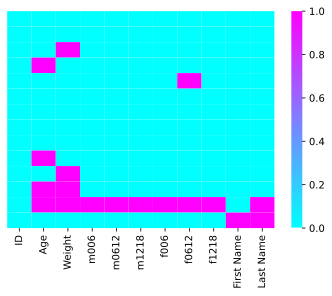

In [37]:
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='svg'
sns.heatmap(patient_heart_rate.isna(),
            yticklabels=False,
            cmap='cool')

b. Get index of rows with missing information Age and Weight

In [38]:
index_age_weight_null=patient_heart_rate[patient_heart_rate['Age'].isna() & patient_heart_rate['Weight'].isna()].index
index_age_weight_null

Int64Index([14, 15], dtype='int64')

c. Drop index Age & Weight are null

In [39]:
patient_heart_rate.drop(index_age_weight_null,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


d. Check data once again

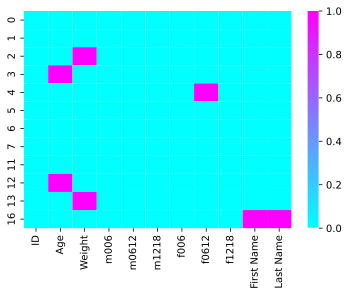

In [40]:
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='svg'
sns.heatmap(patient_heart_rate.isna(),
            yticklabels=True,
            cbar=True,
            cmap='cool')

In [41]:
patient_heart_rate['Age'].fillna(patient_heart_rate['Age'].mean(),inplace=False)

0     56.0
1     34.0
2     16.0
3     36.1
4     54.0
5     52.0
6     19.0
7     32.0
11    12.0
12    36.1
13    34.0
16    52.0
Name: Age, dtype: float64

8.Missing headers

a. Melt the Sex + time range columns in single column

In [42]:
patient_heart_rate=pd.melt(patient_heart_rate,id_vars=['ID','Age','Weight','First Name','Last Name'],value_name='PulseRate',var_name='Sex and Time').sort_values(['ID','Age','Weight','First Name','Last Name'])

In [43]:
patient_heart_rate.head(5)

,ID,Age,Weight,First Name,Last Name,Sex and Time,PulseRate
0,1.0,56.0,70kgs,Micky,Mous,m006,72
12,1.0,56.0,70kgs,Micky,Mous,m0612,69
24,1.0,56.0,70kgs,Micky,Mous,m1218,71
36,1.0,56.0,70kgs,Micky,Mous,f006,-
48,1.0,56.0,70kgs,Micky,Mous,f0612,-


b.Extract to 'Sex,Hour_Lower,Hour_Upper" from sex_and_time columns:

In [44]:
tmp=patient_heart_rate['Sex and Time'].str.extract('(\D)(\d+)(\d{2})',expand=True)

c. Create "Sex, Hour_Lower, Hour_Upper" columns

In [45]:
tmp.columns=['Sex', 'Hour Lower', 'Hour Upper']

d.Create "Time" columns based on "Hour_Lower, Hour_Upper" columns

In [46]:
tmp['Time']=tmp['Hour Lower']+'-'+tmp['Hour Upper']

In [47]:
#Merge 2 dataframe
patient_heart_rate=pd.concat([patient_heart_rate,tmp],axis=1)
patient_heart_rate.head(5)

,ID,Age,Weight,First Name,Last Name,Sex and Time,PulseRate,Sex,Hour Lower,Hour Upper,Time
0,1.0,56.0,70kgs,Micky,Mous,m006,72,m,0,06,0-06
12,1.0,56.0,70kgs,Micky,Mous,m0612,69,m,06,12,06-12
24,1.0,56.0,70kgs,Micky,Mous,m1218,71,m,12,18,12-18
36,1.0,56.0,70kgs,Micky,Mous,f006,-,f,0,06,0-06
48,1.0,56.0,70kgs,Micky,Mous,f0612,-,f,06,12,06-12


e.Drop "sex_and_time,Hour_Lower,Hour_Upper" columns and row to data simple

In [48]:
patient_heart_rate=patient_heart_rate.drop(['Sex and Time','Hour Lower','Hour Upper'],axis=1)
patient_heart_rate.head(5)

,ID,Age,Weight,First Name,Last Name,PulseRate,Sex,Time
0,1.0,56.0,70kgs,Micky,Mous,72,m,0-06
12,1.0,56.0,70kgs,Micky,Mous,69,m,06-12
24,1.0,56.0,70kgs,Micky,Mous,71,m,12-18
36,1.0,56.0,70kgs,Micky,Mous,-,f,0-06
48,1.0,56.0,70kgs,Micky,Mous,-,f,06-12


Hãy khảo sát tỉ lệ dữ liệu thiếu trên biến huyết áp. Dữ liệu bị thiếu thì hãy xử lý bằng phương pháp sau:


1.Thay thế bằng giá trị trung bình liền trước và liền sau của người đó. Nếu không được thì dùng 2)

2.Thay thế bằng giá trị trung bình 2 giá liền trước của người đó. Nếu không được thì dùng 3)

3.Thay thế bằng giá trị trung bình 2 giá liền sau của người đó. Nếu không được thì dùng 4)

4.Trung bình của các giá trị huyết áp của người đó. Nếu không được thì dùng 5)

5.Trung bình của các giá trị huyết áp của nhóm giới tính. Nếu không được thì dùng 6)

6.Trung bình của các giá trị dữ liệu. Nếu không được thì thay bằng mức ổn định trong y học

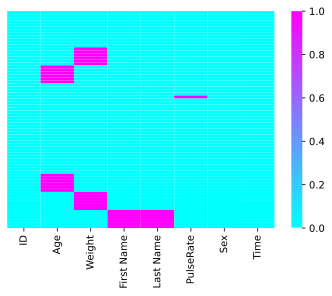

In [49]:
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='svg'
sns.heatmap(patient_heart_rate.isna(),
            yticklabels=False,
            cbar=True,
            cmap='cool')

In [50]:
patient_heart_rate['PulseRate']=patient_heart_rate['PulseRate'].replace({'-':'0'},regex=True)
patient_heart_rate.head(10)

,ID,Age,Weight,First Name,Last Name,PulseRate,Sex,Time
0,1.0,56.0,70kgs,Micky,Mous,72,m,0-06
12,1.0,56.0,70kgs,Micky,Mous,69,m,06-12
24,1.0,56.0,70kgs,Micky,Mous,71,m,12-18
36,1.0,56.0,70kgs,Micky,Mous,0,f,0-06
48,1.0,56.0,70kgs,Micky,Mous,0,f,06-12
60,1.0,56.0,70kgs,Micky,Mous,0,f,12-18
1,2.0,34.0,70kgs,Donald,Duck,0,m,0-06
13,2.0,34.0,70kgs,Donald,Duck,0,m,06-12
25,2.0,34.0,70kgs,Donald,Duck,0,m,12-18
37,2.0,34.0,70kgs,Donald,Duck,85,f,0-06


In [52]:
def avgPulserate(patient_heart_rate, firstname):
  sumPulserate = 0
  nsumPulserate = 0
  for i, value in enumerate(patient_heart_rate['First Name']):
    if value==firstname:
      try:
        if patient_heart_rate['PulseRate'][i] != '0':
          sumPulserate +=int(patient_heart_rate['PulseRate'].values[i])
          nsumPulserate +=1
      except:
        pass
    if nsumPulserate > 0:
      return str(sumPulserate/nsumPulserate)
    else:
      return 0